<a href="https://colab.research.google.com/github/Montaser778/Neural_Network/blob/main/Lab4_Neural_Network_Montaser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Lab 4: Neural Networks with TensorFlow/Keras**
## **Objective**
In this lab, we will build a **basic neural network** to classify handwritten digits using the **MNIST dataset**.
The goal is to preprocess the data, design an efficient model, train it, evaluate its performance, and visualize the results.

## **Workflow Overview**
1. **Preprocess the MNIST dataset** - Load the dataset, normalize images, and reshape them.
2. **Design and train a neural network** - Build a multi-layer neural network using **TensorFlow/Keras**.
3. **Evaluate the model** - Measure accuracy and loss on the test dataset.
4. **Visualize the results** - Plot accuracy/loss graphs and display confusion matrix.
5. **Analyze incorrect predictions** - Show misclassified examples for further insights.

---
## **Step 1: Import Required Libraries**
Below, we import all necessary libraries for data processing, model building, evaluation, and visualization.


In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


---
## **Step 2: Load and Preprocess the MNIST Dataset**
In this step, we:
- Load the **MNIST dataset** (handwritten digits 0-9).
- Normalize images by scaling pixel values to **[0,1]** range for faster training.
- Reshape the images to fit the neural network input layer.


In [ ]:

# Load MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images for a dense neural network
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


---
## **Step 3: Define and Compile the Neural Network**
Now, we design the **neural network architecture**:
- **Input layer**: Accepts the flattened 28x28 pixel images.
- **Hidden layers**: Three fully connected (Dense) layers with:
  - **ReLU activation** for feature learning.
  - **Batch Normalization** for stable training.
  - **Dropout** to prevent overfitting.
- **Output layer**: 10 neurons (one for each digit) with **softmax activation**.

We compile the model using:
- **AdamW optimizer** (improves generalization).
- **Sparse categorical crossentropy loss** (since labels are integers).

In [ ]:

# Define the neural network model with Dropout
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(28*28,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---
## **Step 4: Train the Model**
- We **train** the neural network using the training dataset.
- **Early Stopping** is used to prevent overfitting (stops training if validation loss doesn't improve for 5 epochs).

In [ ]:

# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=32, callbacks=[early_stopping])


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8081 - loss: 0.6142 - val_accuracy: 0.9588 - val_loss: 0.1351
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9305 - loss: 0.2349 - val_accuracy: 0.9666 - val_loss: 0.1118
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9421 - loss: 0.1908 - val_accuracy: 0.9709 - val_loss: 0.1002
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9484 - loss: 0.1697 - val_accuracy: 0.9737 - val_loss: 0.0837
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9552 - loss: 0.1504 - val_accuracy: 0.9755 - val_loss: 0.0777
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9592 - loss: 0.1333 - val_accuracy: 0.9779 - val_loss: 0.0699
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9616 - loss: 0.1283 - val_accuracy: 0.9795 - val_loss: 0.0689
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9647 - loss: 0

---
## **Step 5: Evaluate the Model**
- The trained model is tested on **unseen test data**.
- We measure the **test accuracy**.

In [ ]:

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9800 - loss: 0.0715
Test accuracy: 0.9831


---
## **Step 6: Visualize Training Performance**
We plot graphs to analyze:
- **Training vs Validation Accuracy**.
- **Training vs Validation Loss**.

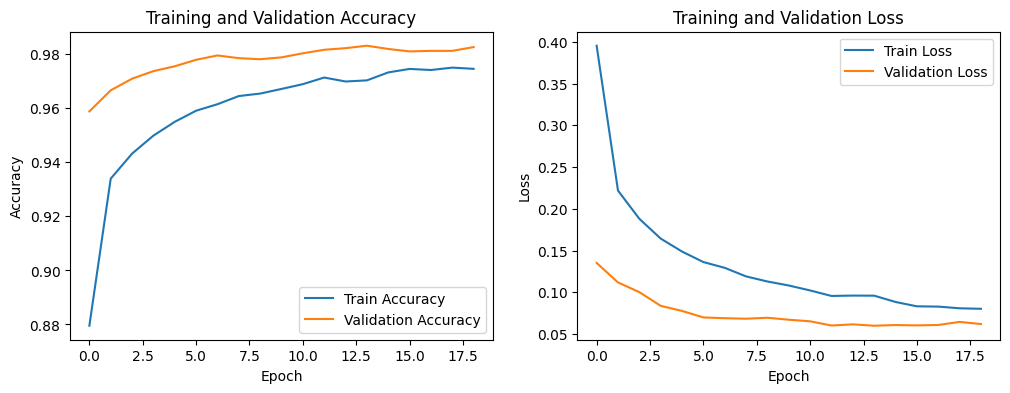

In [ ]:

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


---
## **Step 7: Confusion Matrix Analysis**
- We **predict the test set** and generate a **confusion matrix** to analyze classification errors.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


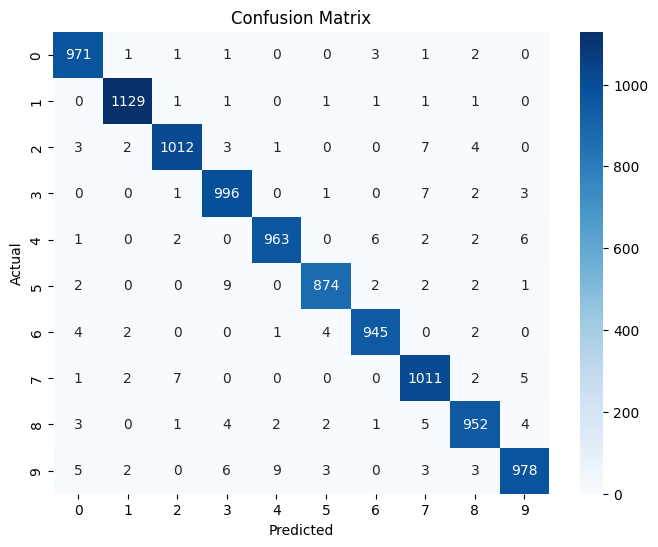

In [ ]:

# Predict the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


---
## **Step 8: Analyze Incorrect Predictions**
- We display some test images **where the model made incorrect predictions**.
- This helps us understand which numbers the model confuses the most.

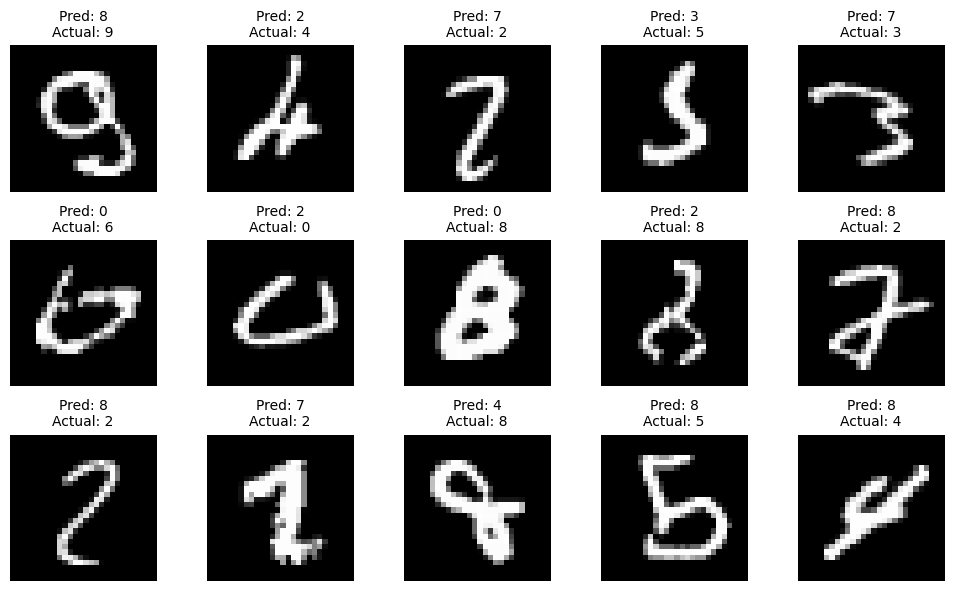

In [ ]:
# Display incorrect predictions
incorrect = np.where(y_pred != y_test)[0]

fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.flatten()

for i in range(15):
    img = x_test[incorrect[i]].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Pred: {y_pred[incorrect[i]]}\nActual: {y_test[incorrect[i]]}", fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()



---
## **Conclusion**
- We successfully **built, trained, and evaluated** a neural network for **handwritten digit classification**.
- The model achieves **high accuracy** on the test dataset.
- Using **confusion matrix and incorrect predictions**, we identified areas for potential improvement.